In [1]:
import dwdatareader as dw
import matplotlib.pyplot as plt 
import noisereduce as nr
from IPython.display import Audio
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift, rfft, rfftfreq
from scipy.signal import butter,filtfilt
import numpy as np
import acoustics.signal as S
import pandas as pd
import re
import os
import librosa as l
import scipy
import PyOctaveBand
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import mixture
from sklearn.svm import SVC
import more_itertools as mit
import seaborn as sns
import math
import os
import csv
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from scipy.fftpack import dct
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import percentile
from model import machine
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import RocCurveDisplay
import scikitplot as skplt
from sklearn.metrics import f1_score
from mlxtend.evaluate import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
import random


c:\Users\anand\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
def train_model(train_data, train_label,model_name):
    if model_name=='Random':
        num_trees = 1066 #1000
        max_depth = 98 #100
        model = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, min_samples_split=5, criterion="entropy", verbose=0,class_weight='balanced')
        model.fit(train_data, train_label)
    elif model_name=='SVM':
        gamma=1
        C=10
        model=SVC(kernel='rbf',gamma=gamma, C=C,probability=True)
        model.fit(train_data, train_label)
    elif model_name=='Autoencoder':
        print("Autoencoder")
    return model
    
def evaluation_matrix(model, train_data, train_label, test_data, test_label):
    cM=metrics.confusion_matrix(test_label, model.predict(test_data))
    print("Confusion matrix \n",cM)

    bal_accuracy= balanced_accuracy_score(test_label, model.predict(test_data))
    print("Balance Accuracy=",bal_accuracy)
    print("Class wise accuracy",cM.diagonal()/cM.sum(axis=1))
    print("Per class accuracy class 1", accuracy_score(test_label, model.predict(test_data),method='binary', pos_label=1))
    print("Per class accuracy class 0", accuracy_score(test_label, model.predict(test_data),method='binary', pos_label=0))
    print("average per class  accuracy", accuracy_score(test_label, model.predict(test_data),method='average'))
    target_names = ['Anomalous','Not Anomalous']
    cR=metrics.classification_report(test_label, model.predict(test_data),target_names=target_names)
    print("ClassificationReport \n",cR)

    labels = np.arange(2)
    target_names = ['Anomalous','Not Anomalous']
    cR=metrics.classification_report(test_label, model.predict(test_data),labels=labels,target_names=target_names,output_dict=True)
    print("ClassificationReport \n",cR)   

    sns.heatmap(pd.DataFrame(cR).iloc[:-1, :-2].T, annot=True)

    # cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    # scores = cross_val_score(model,train_data, train_label, cv=cv,scoring="accuracy")
    # print('Scores',scores, np.average(scores))

    f1_weighted_1=f1_score(test_label, model.predict(test_data),average='weighted')
    print("F1 weighted",f1_weighted_1)#,f1_weighted_0)
    print("Precison weighted", precision_score(test_label, model.predict(test_data),labels=[1,0] ,average='weighted'))
    print("recall weighted", recall_score(test_label, model.predict(test_data),labels=[1,0] ,average='weighted'))

    print("Confusion matrix \n")
    ConfusionMatrixDisplay.from_predictions(test_label, model.predict(test_data))
    plt.show()
   
    rf_disp = RocCurveDisplay.from_estimator(model, test_data, test_label)
    plt.show()

    fig, ax = plt.subplots(1,2,figsize=(15,6))
    pr = skplt.metrics.plot_precision_recall(test_label, model.predict_proba(test_data),ax=ax[1])
    roc = skplt.metrics.plot_roc(test_label, model.predict_proba(test_data),ax=ax[0])
    plt.show()

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cM.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cM.flatten()/np.sum(cM)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cM, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Anomalous','Not anomalous'])
    ax.yaxis.set_ticklabels(['Anomalous','Not anomalous'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
def undersampling(train_data, train_label):
    rus = RandomUnderSampler()
    undersample_data,undersample_label=rus.fit_resample(train_data, train_label)
    print("Length of train: ", len(undersample_data),"Length of label :", len(undersample_label))
    unique, counts = np.unique(undersample_label, return_counts=True)
    d3=dict(zip(unique, counts))
    print(f"Numbers of class instances (Undersampling): {d3}")
    return undersample_data, undersample_label

def normalize_data(data):
    norm_time=MinMaxScaler()
    norm_time.fit(data.iloc[:,:-1])
    norm_data=norm_time.transform(data.iloc[:,:-1])
    norm_data=pd.concat([pd.DataFrame(norm_data),data.iloc[:,-1:]],axis=1)

    label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
    data=np.array(norm_data.iloc[:,:-1])
    
    unique, counts = np.unique(label, return_counts=True)
    d=dict(zip(unique, counts))
    print(f"Numbers of class instances (Raw): {d}")
    return norm_data
    
def split_data(data,label):
    indices = np.arange(len(data))
    x_train, x_test, y_train, y_test,indices_train,indices_test= train_test_split(data, label, indices, test_size=0.2,random_state=20,shuffle=True)
    return x_train, x_test, y_train, y_test,indices_train,indices_test
def learning_curve_plot(model,data,label,model_name):
    if model_name=='Random':
        num_trees = 1066 #1000
        max_depth = 98 #100
        model = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, min_samples_split=5, criterion="entropy", verbose=0,class_weight='balanced')
    elif model_name=='SVM':
        gamma=1
        C=10
        model=SVC(kernel='rbf',gamma=gamma, C=C,probability=True)
    train_size=[]    
    datasize=int(data.shape[0]*0.8)
    for i in range(0,5):
        train_size.append(random.randint(1,datasize))
    train_size.sort()

    train_sizes,train_scores,validation_scores=learning_curve(estimator=model, X=data, y=label, train_sizes=train_size, cv = 5, scoring = 'balanced_accuracy')

    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    # print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    # print('\n', '-' * 20) # separator
    # print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training Accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation Accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for '+model_name, fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()

# II TIME

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/II.csv -------------
Numbers of class instances (Raw): {0: 996, 1: 16331}
Numbers of class instances (Raw): {0: 996, 1: 16331}
Length of train:  13861 Length of test : 3466
Numbers of class instances (Train): {0: 791, 1: 13070}
Numbers of class instances (Test): {0: 205, 1: 3261}
Length of train:  1582 Length of label : 1582
Numbers of class instances (Undersampling): {0: 791, 1: 791}
---------------Train Random forest----------------
Confusion matrix 
 [[ 118   87]
 [1143 2118]]
Balance Accuracy= 0.6125518881683757
Class wise accuracy [0.57560976 0.64949402]
Per class accuracy class 1 0.6451240623196769
Per class accuracy class 0 0.6451240623196769
average per class  accuracy 0.6451240623196769
ClassificationReport 
                precision    recall  f1-score   support

    Anomalous       0.09      0.58      0.16       205
Not Anomalous       0.96      0.65      0.77      3261

  

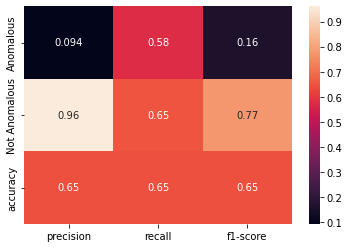

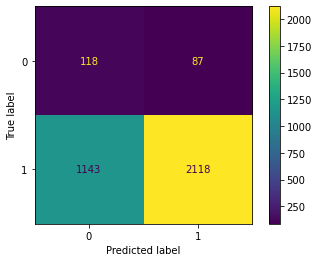

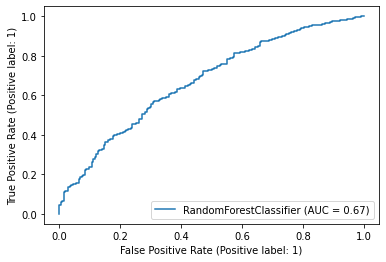

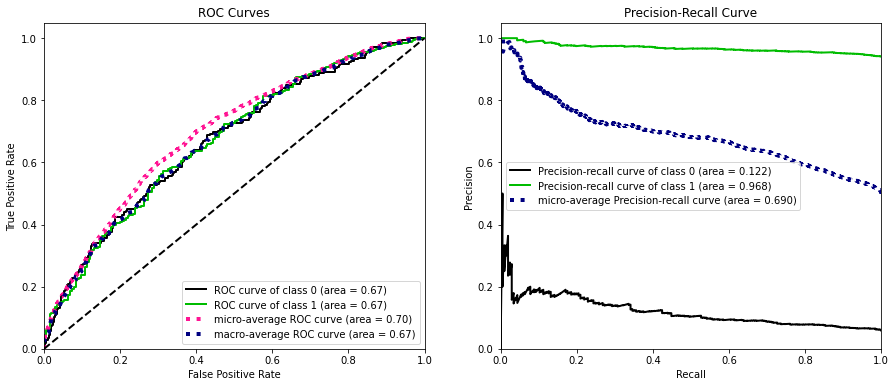

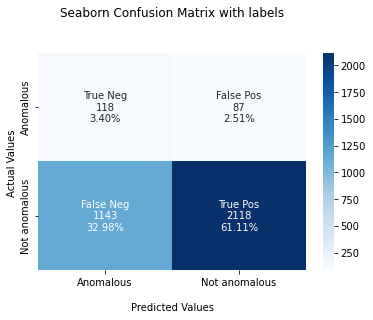

-------------------Train SVM----------------------
Confusion matrix 
 [[ 140   65]
 [1631 1630]]
Balance Accuracy= 0.5913867510340237
Class wise accuracy [0.68292683 0.49984667]
Per class accuracy class 1 0.5106751298326602
Per class accuracy class 0 0.5106751298326602
average per class  accuracy 0.5106751298326602
ClassificationReport 
                precision    recall  f1-score   support

    Anomalous       0.08      0.68      0.14       205
Not Anomalous       0.96      0.50      0.66      3261

     accuracy                           0.51      3466
    macro avg       0.52      0.59      0.40      3466
 weighted avg       0.91      0.51      0.63      3466

ClassificationReport 
 {'Anomalous': {'precision': 0.07905138339920949, 'recall': 0.6829268292682927, 'f1-score': 0.1417004048582996, 'support': 205}, 'Not Anomalous': {'precision': 0.9616519174041298, 'recall': 0.4998466727997547, 'f1-score': 0.6577885391444713, 'support': 3261}, 'accuracy': 0.5106751298326602, 'macro avg': 

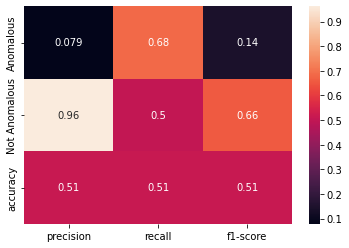

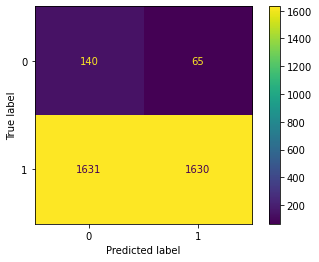

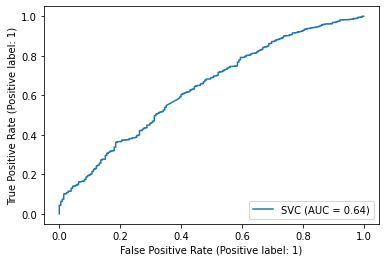

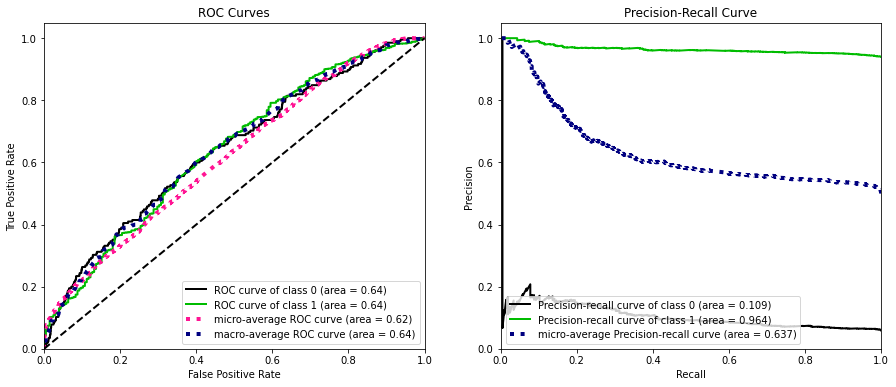

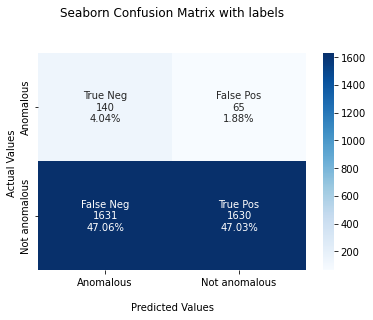

In [15]:
time_col_list=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/II.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.columns=time_col_list

new_df=df[['avg_rotation','avg_force','root_mean_square','energy','distance','zero_cross','variance','label']]

## Normalize data
norm_data= normalize_data(new_df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)

print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)


# III TIME

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/III.csv -------------
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Length of train:  4933 Length of test : 1234
Numbers of class instances (Train): {0: 2814, 1: 2119}
Numbers of class instances (Test): {0: 685, 1: 549}
Length of train:  4238 Length of label : 4238
Numbers of class instances (Undersampling): {0: 2119, 1: 2119}
---------------Train Random forest----------------
Confusion matrix 
 [[501 184]
 [125 424]]
Balance Accuracy= 0.7518500791086647
Class wise accuracy [0.73138686 0.7723133 ]
Per class accuracy class 1 0.7495948136142626
Per class accuracy class 0 0.7495948136142626
average per class  accuracy 0.7495948136142626
ClassificationReport 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       685
           1       0.70      0.77      0.73       549

    accu

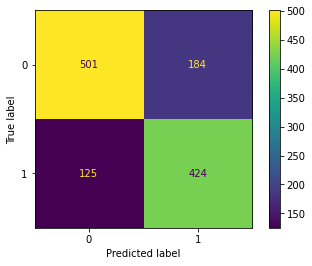

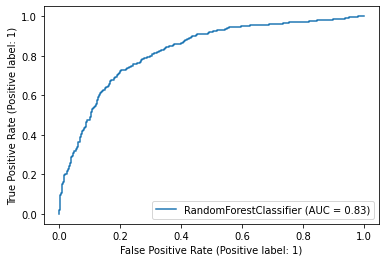

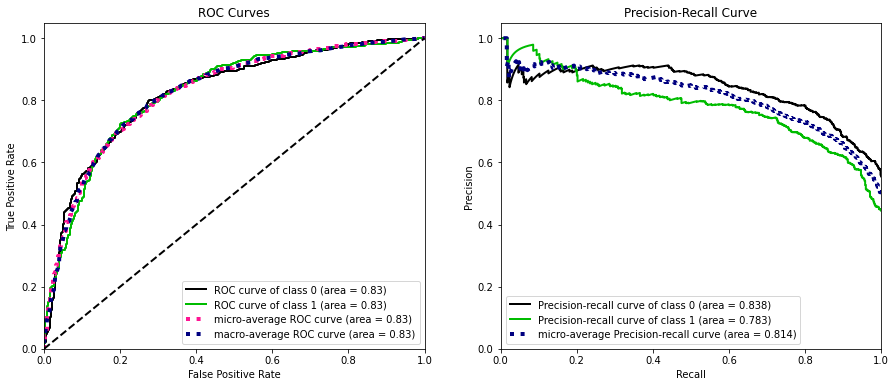

-------------------Train SVM----------------------
Confusion matrix 
 [[381 304]
 [111 438]]
Balance Accuracy= 0.6770092936061585
Class wise accuracy [0.55620438 0.79781421]
Per class accuracy class 1 0.6636952998379254
Per class accuracy class 0 0.6636952998379254
average per class  accuracy 0.6636952998379254
ClassificationReport 
               precision    recall  f1-score   support

           0       0.77      0.56      0.65       685
           1       0.59      0.80      0.68       549

    accuracy                           0.66      1234
   macro avg       0.68      0.68      0.66      1234
weighted avg       0.69      0.66      0.66      1234

Scores [0.68632075 0.62735849 0.67216981 0.66706021 0.66587957] 0.6637577688178031
F1 weighted 0.6612605048639747
Precison weighted 0.6924879200595577
recall weighted 0.6636952998379254
Confusion matrix 



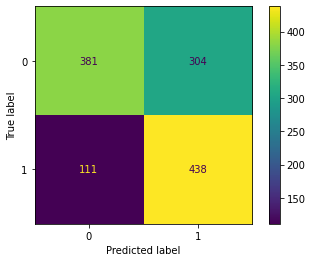

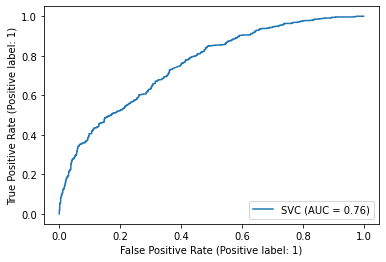

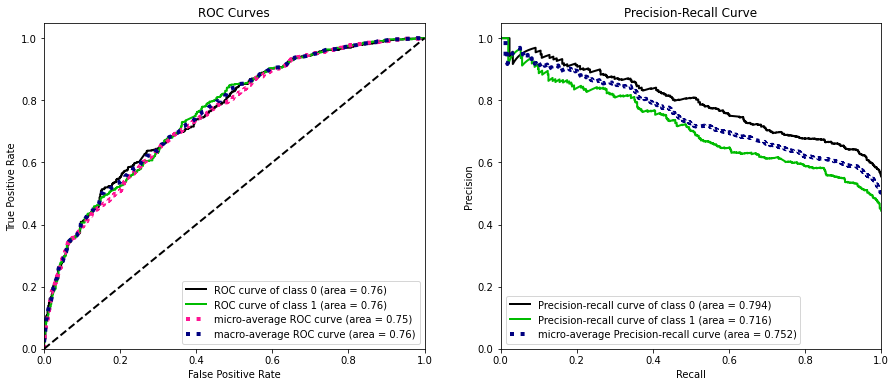

In [4]:
time_col_list=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/III.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.columns=time_col_list

new_df=df[['avg_rotation','avg_force','root_mean_square','energy','distance','zero_cross','variance','label']]

## Normalize data
norm_data= normalize_data(new_df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# IV TIME

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/IV.csv -------------
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Length of train:  13938 Length of test : 3485
Numbers of class instances (Train): {0: 8806, 1: 5132}
Numbers of class instances (Test): {0: 2174, 1: 1311}
Length of train:  10264 Length of label : 10264
Numbers of class instances (Undersampling): {0: 5132, 1: 5132}
---------------Train Random forest----------------
Confusion matrix 
 [[1456  718]
 [ 425  886]]
Balance Accuracy= 0.6727765977080216
Class wise accuracy [0.66973321 0.67581998]
Per class accuracy class 1 0.6720229555236729
Per class accuracy class 0 0.6720229555236729
average per class  accuracy 0.6720229555236729
ClassificationReport 
               precision    recall  f1-score   support

           0       0.77      0.67      0.72      2174
           1       0.55      0.68      0.61      1311

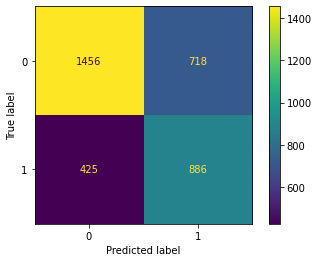

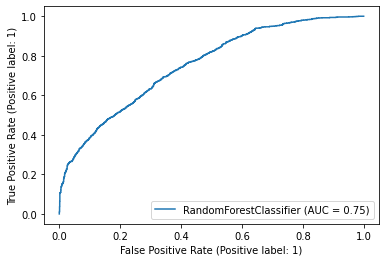

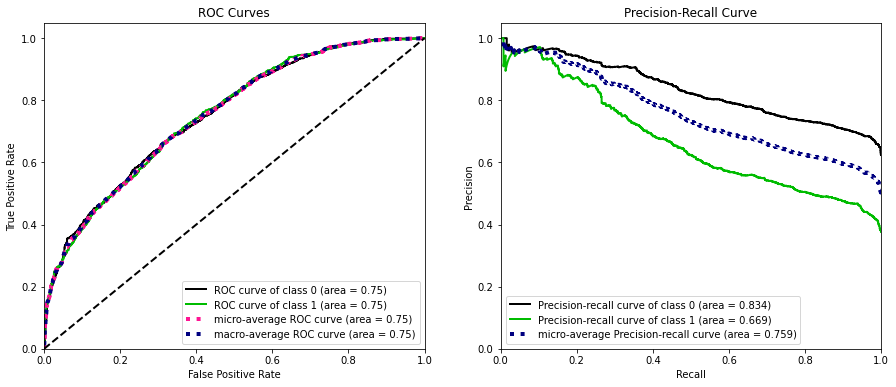

-------------------Train SVM----------------------
Confusion matrix 
 [[1631  543]
 [ 624  687]]
Balance Accuracy= 0.6371287253773007
Class wise accuracy [0.75022999 0.52402746]
Per class accuracy class 1 0.6651362984218078
Per class accuracy class 0 0.6651362984218078
average per class  accuracy 0.6651362984218078
ClassificationReport 
               precision    recall  f1-score   support

           0       0.72      0.75      0.74      2174
           1       0.56      0.52      0.54      1311

    accuracy                           0.67      3485
   macro avg       0.64      0.64      0.64      3485
weighted avg       0.66      0.67      0.66      3485

Scores [0.64831953 0.62006819 0.63468095 0.61714564 0.60087719] 0.6242183026978063
F1 weighted 0.6628611237650697
Precison weighted 0.661307217819798
recall weighted 0.6651362984218078
Confusion matrix 



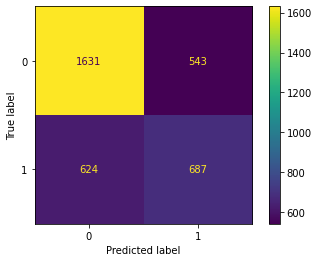

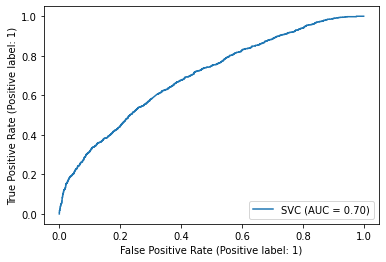

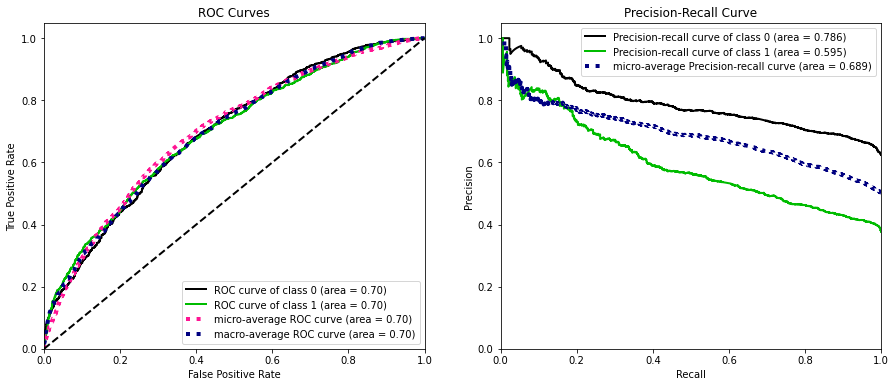

In [5]:
time_col_list=['Peak','energy','impulse_factor','kurtosis_factor','clearance_factor','square_root_mean','root_mean_square','kurtosis','margin_factor','crest_factor','skewness','peak_to_peak_value','shape_factor','mean','variance','distance','zero_cross','avg_rotation','avg_force','label']
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/IV.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.columns=time_col_list

new_df=df[['avg_rotation','avg_force','root_mean_square','energy','distance','zero_cross','variance','label']]

## Normalize data
norm_data= normalize_data(new_df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# II MFCC

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/MFCC/II.csv -------------
Numbers of class instances (Raw): {0: 996, 1: 16331}
Numbers of class instances (Raw): {0: 996, 1: 16331}
Length of train:  13861 Length of test : 3466
Numbers of class instances (Train): {0: 791, 1: 13070}
Numbers of class instances (Test): {0: 205, 1: 3261}
Length of train:  1582 Length of label : 1582
Numbers of class instances (Undersampling): {0: 791, 1: 791}
---------------Train Random forest----------------
Confusion matrix 
 [[ 133   72]
 [1082 2179]]
Balance Accuracy= 0.658490213236999
Class wise accuracy [0.64878049 0.66819994]
Per class accuracy class 1 0.6670513560300058
Per class accuracy class 0 0.6670513560300058
average per class  accuracy 0.6670513560300058
ClassificationReport 
               precision    recall  f1-score   support

           0       0.11      0.65      0.19       205
           1       0.97      0.67      0.79      3261

    ac

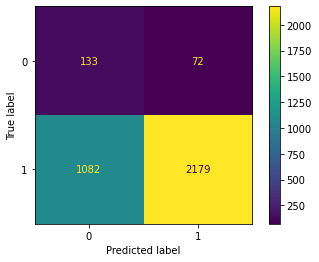

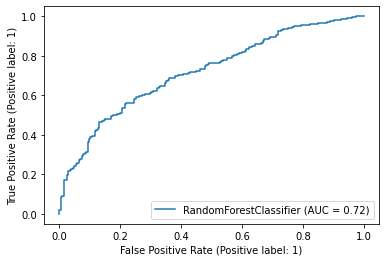

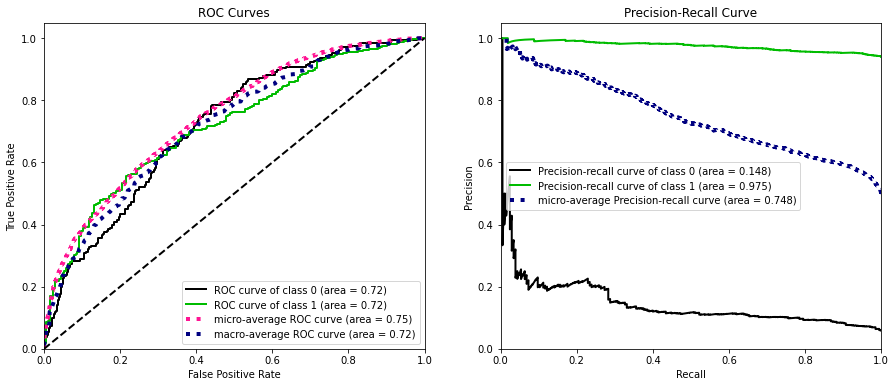

-------------------Train SVM----------------------
Confusion matrix 
 [[ 133   72]
 [1024 2237]]
Balance Accuracy= 0.6673831908512278
Class wise accuracy [0.64878049 0.68598589]
Per class accuracy class 1 0.6837853433352568
Per class accuracy class 0 0.6837853433352568
average per class  accuracy 0.6837853433352568
ClassificationReport 
               precision    recall  f1-score   support

           0       0.11      0.65      0.20       205
           1       0.97      0.69      0.80      3261

    accuracy                           0.68      3466
   macro avg       0.54      0.67      0.50      3466
weighted avg       0.92      0.68      0.77      3466

Scores [0.6214511  0.70031546 0.66455696 0.64873418 0.70253165] 0.6675178692648644
F1 weighted 0.7672749426699471
Precison weighted 0.9183149673391172
recall weighted 0.6837853433352568
Confusion matrix 



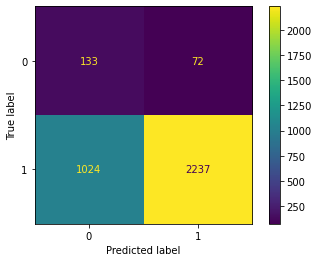

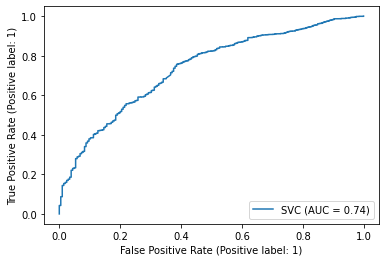

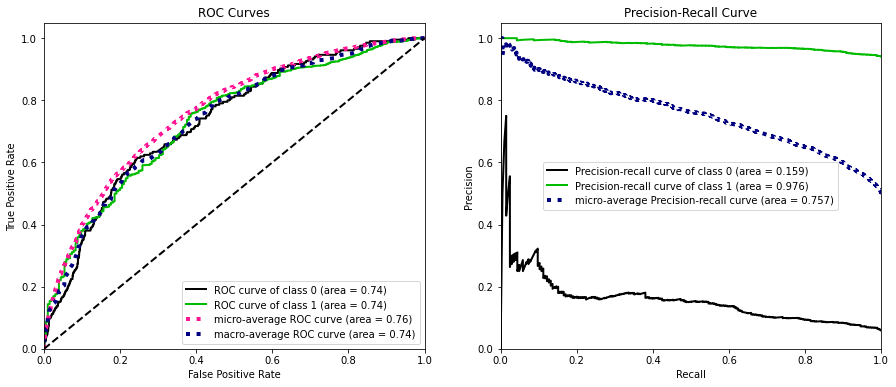

In [22]:
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/MFCC/II.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.rename(columns={ df.columns[-1]: "label" }, inplace = True)  
## Normalize data
norm_data= normalize_data(df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# III MFCC

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/MFCC/III.csv -------------
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Length of train:  4933 Length of test : 1234
Numbers of class instances (Train): {0: 2814, 1: 2119}
Numbers of class instances (Test): {0: 685, 1: 549}
Length of train:  4238 Length of label : 4238
Numbers of class instances (Undersampling): {0: 2119, 1: 2119}
---------------Train Random forest----------------
Confusion matrix 
 [[477 208]
 [109 440]]
Balance Accuracy= 0.7489037799316607
Class wise accuracy [0.69635036 0.80145719]
Per class accuracy class 1 0.7431118314424635
Per class accuracy class 0 0.7431118314424635
average per class  accuracy 0.7431118314424635
ClassificationReport 
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       685
           1       0.68      0.80      0.74       549

    accu

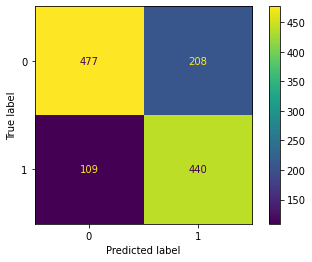

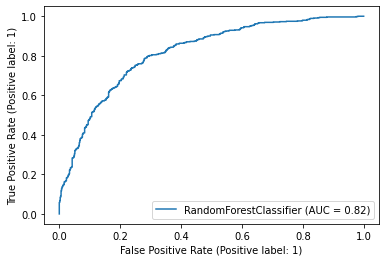

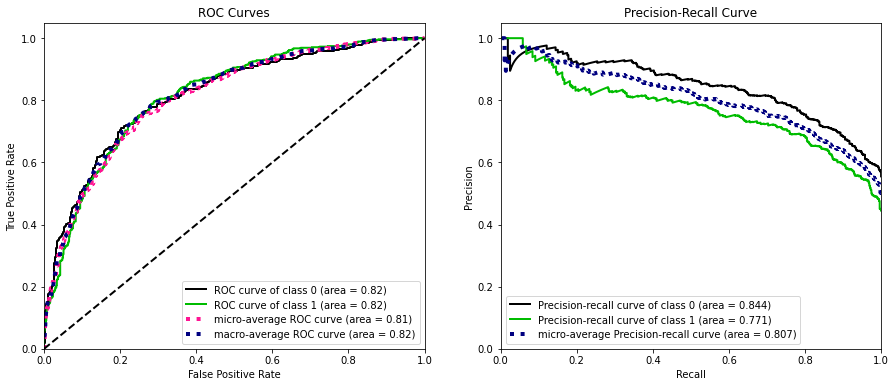

-------------------Train SVM----------------------
Confusion matrix 
 [[528 157]
 [118 431]]
Balance Accuracy= 0.7779333359924481
Class wise accuracy [0.77080292 0.78506375]
Per class accuracy class 1 0.7771474878444085
Per class accuracy class 0 0.7771474878444085
average per class  accuracy 0.7771474878444085
ClassificationReport 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       685
           1       0.73      0.79      0.76       549

    accuracy                           0.78      1234
   macro avg       0.78      0.78      0.78      1234
weighted avg       0.78      0.78      0.78      1234

Scores [0.75353774 0.73466981 0.76768868 0.75560803 0.74616293] 0.751533436546301
F1 weighted 0.7777045650074679
Precison weighted 0.7798131493491365
recall weighted 0.7771474878444085
Confusion matrix 



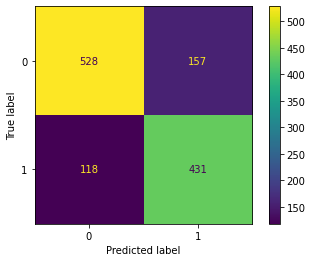

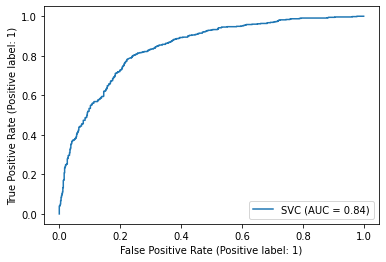

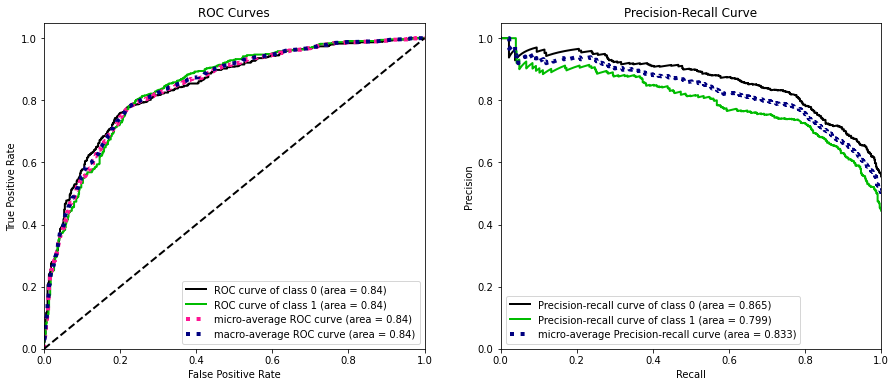

In [17]:
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/MFCC/III.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.rename(columns={ df.columns[-1]: "label" }, inplace = True)  
## Normalize data
norm_data= normalize_data(df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# IV MFCC

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/MFCC/IV.csv -------------
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Length of train:  13938 Length of test : 3485
Numbers of class instances (Train): {0: 8806, 1: 5132}
Numbers of class instances (Test): {0: 2174, 1: 1311}
Length of train:  10264 Length of label : 10264
Numbers of class instances (Undersampling): {0: 5132, 1: 5132}
---------------Train Random forest----------------
Confusion matrix 
 [[1618  556]
 [ 455  856]]
Balance Accuracy= 0.6985934597703811
Class wise accuracy [0.74425023 0.65293669]
Per class accuracy class 1 0.7098995695839311
Per class accuracy class 0 0.7098995695839311
average per class  accuracy 0.7098995695839311
ClassificationReport 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      2174
           1       0.61      0.65      0.63      1311

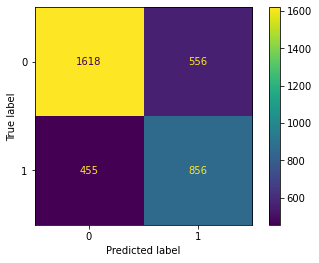

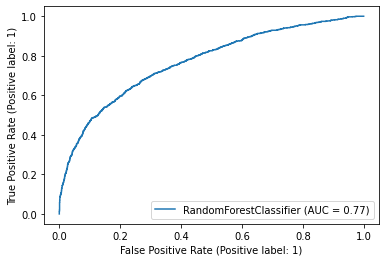

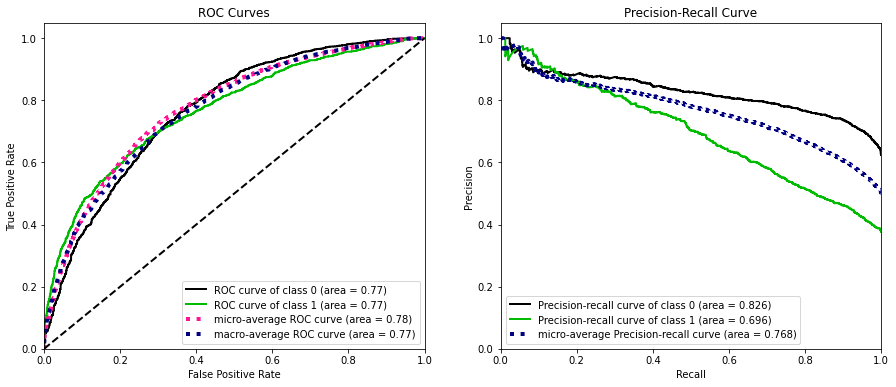

-------------------Train SVM----------------------
Confusion matrix 
 [[1578  596]
 [ 387  924]]
Balance Accuracy= 0.715328228976104
Class wise accuracy [0.72585097 0.70480549]
Per class accuracy class 1 0.7179340028694404
Per class accuracy class 0 0.7179340028694404
average per class  accuracy 0.7179340028694404
ClassificationReport 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      2174
           1       0.61      0.70      0.65      1311

    accuracy                           0.72      3485
   macro avg       0.71      0.72      0.71      3485
weighted avg       0.73      0.72      0.72      3485

Scores [0.71651242 0.70189966 0.71066732 0.71018022 0.70565302] 0.7089825283021376
F1 weighted 0.7212243329970971
Precison weighted 0.7296379248031366
recall weighted 0.7179340028694404
Confusion matrix 



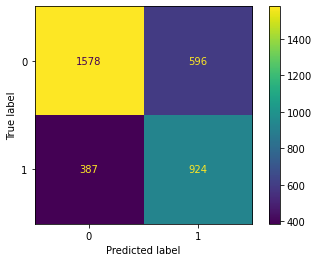

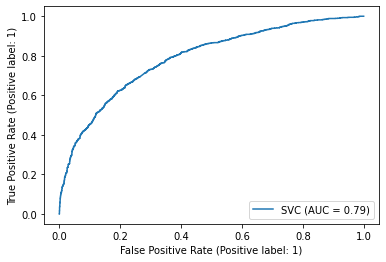

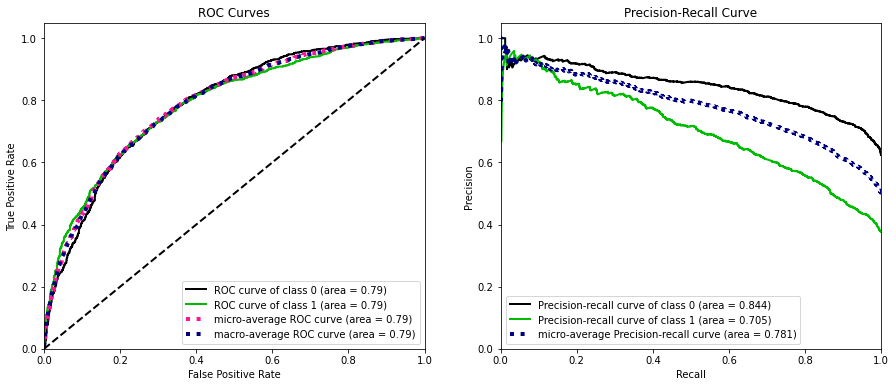

In [18]:
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/MFCC/IV.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.rename(columns={ df.columns[-1]: "label" }, inplace = True)  
## Normalize data
norm_data= normalize_data(df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# II PSD

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/II.csv -------------
Numbers of class instances (Raw): {0: 996, 1: 16331}
Numbers of class instances (Raw): {0: 996, 1: 16331}
Length of train:  13861 Length of test : 3466
Numbers of class instances (Train): {0: 791, 1: 13070}
Numbers of class instances (Test): {0: 205, 1: 3261}
Length of train:  1582 Length of label : 1582
Numbers of class instances (Undersampling): {0: 791, 1: 791}
---------------Train Random forest----------------
Confusion matrix 
 [[ 118   87]
 [1345 1916]]
Balance Accuracy= 0.5815797937188203
Class wise accuracy [0.57560976 0.58754983]
Per class accuracy class 1 0.5868436237738026
Per class accuracy class 0 0.5868436237738026
average per class  accuracy 0.5868436237738026
ClassificationReport 
               precision    recall  f1-score   support

           0       0.08      0.58      0.14       205
           1       0.96      0.59      0.73      3261

    ac

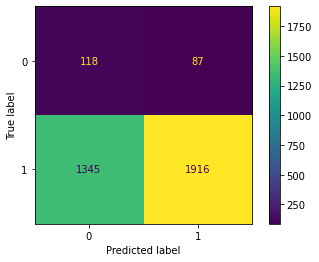

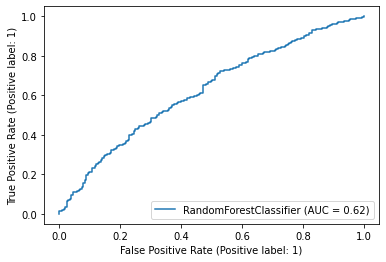

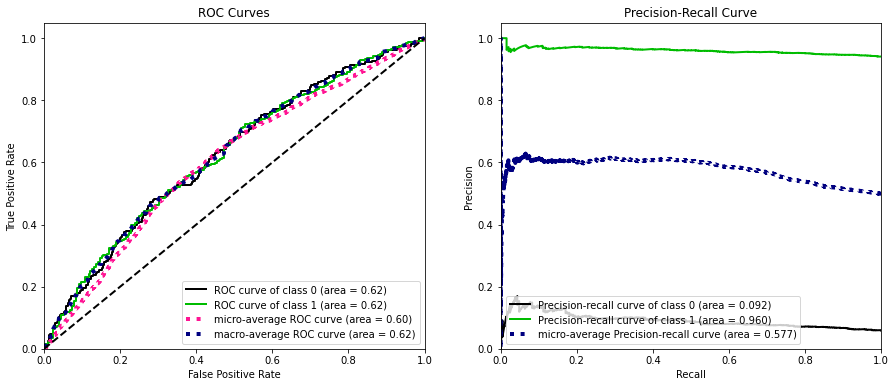

-------------------Train SVM----------------------
Confusion matrix 
 [[ 121   84]
 [1647 1614]]
Balance Accuracy= 0.5425920524154644
Class wise accuracy [0.5902439 0.4949402]
Per class accuracy class 1 0.5005770340450086
Per class accuracy class 0 0.5005770340450086
average per class  accuracy 0.5005770340450086
ClassificationReport 
               precision    recall  f1-score   support

           0       0.07      0.59      0.12       205
           1       0.95      0.49      0.65      3261

    accuracy                           0.50      3466
   macro avg       0.51      0.54      0.39      3466
weighted avg       0.90      0.50      0.62      3466

Scores [0.55835962 0.55205047 0.51582278 0.52848101 0.56012658] 0.5429680948768119
F1 weighted 0.6196919371231293
Precison weighted 0.898357883036713
recall weighted 0.5005770340450086
Confusion matrix 



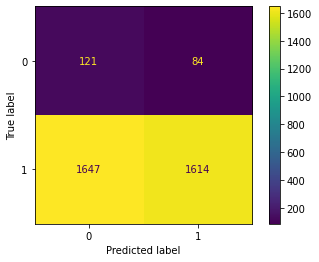

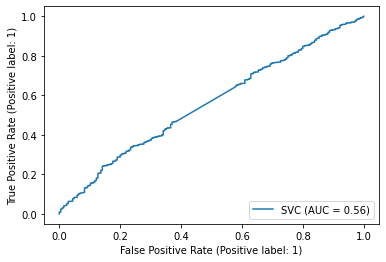

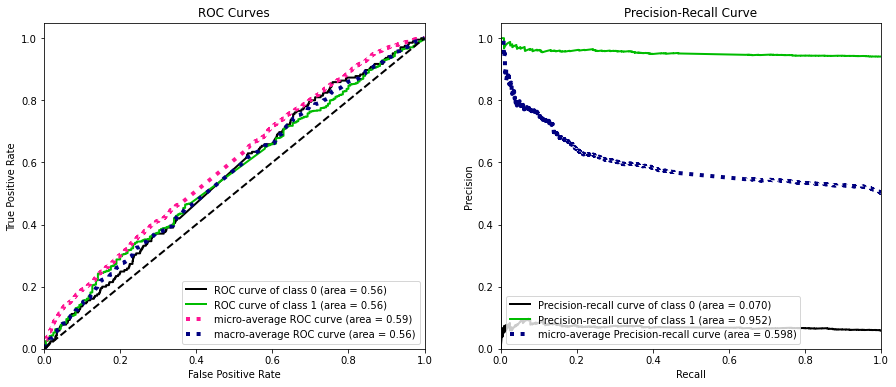

In [19]:
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/II.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.rename(columns={ df.columns[-1]: "label" }, inplace = True)  
## Normalize data
norm_data= normalize_data(df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# III PSD

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/III.csv -------------
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Length of train:  4933 Length of test : 1234
Numbers of class instances (Train): {0: 2814, 1: 2119}
Numbers of class instances (Test): {0: 685, 1: 549}
Length of train:  4238 Length of label : 4238
Numbers of class instances (Undersampling): {0: 2119, 1: 2119}
---------------Train Random forest----------------
Confusion matrix 
 [[417 268]
 [174 375]]
Balance Accuracy= 0.6459096166886044
Class wise accuracy [0.60875912 0.68306011]
Per class accuracy class 1 0.6418152350081038
Per class accuracy class 0 0.6418152350081038
average per class  accuracy 0.6418152350081038
ClassificationReport 
               precision    recall  f1-score   support

           0       0.71      0.61      0.65       685
           1       0.58      0.68      0.63       549

    accur

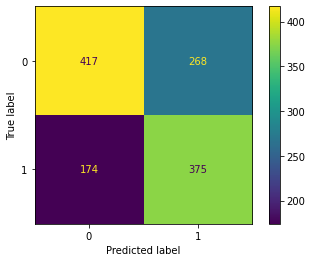

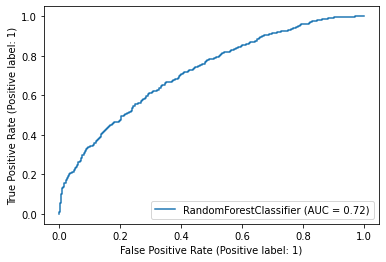

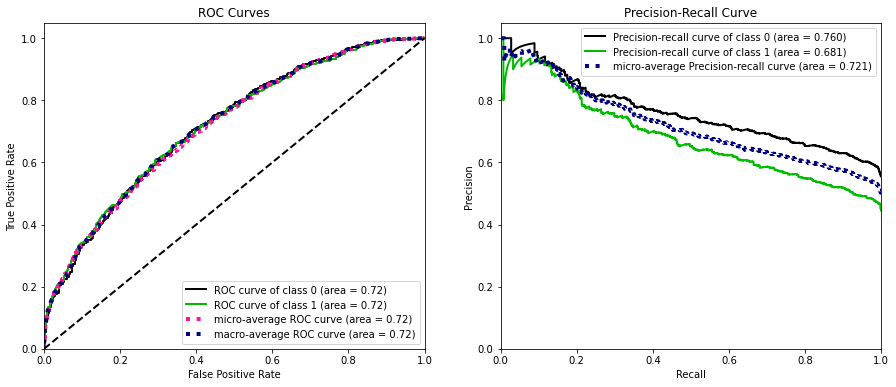

-------------------Train SVM----------------------
Confusion matrix 
 [[481 204]
 [254 295]]
Balance Accuracy= 0.619765200164865
Class wise accuracy [0.70218978 0.53734062]
Per class accuracy class 1 0.6288492706645057
Per class accuracy class 0 0.6288492706645057
average per class  accuracy 0.6288492706645057
ClassificationReport 
               precision    recall  f1-score   support

           0       0.65      0.70      0.68       685
           1       0.59      0.54      0.56       549

    accuracy                           0.63      1234
   macro avg       0.62      0.62      0.62      1234
weighted avg       0.63      0.63      0.63      1234

Scores [0.5884434  0.57665094 0.625      0.62455726 0.61275089] 0.6054804972043394
F1 weighted 0.626529828008595
Precison weighted 0.6262868961111012
recall weighted 0.6288492706645057
Confusion matrix 



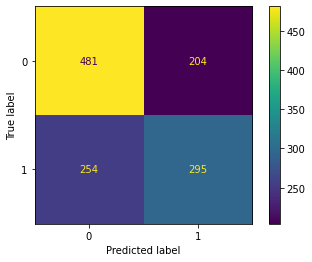

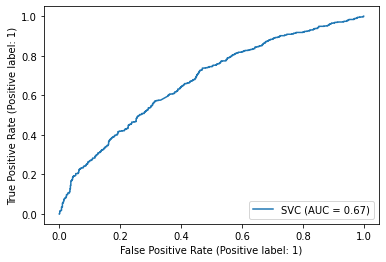

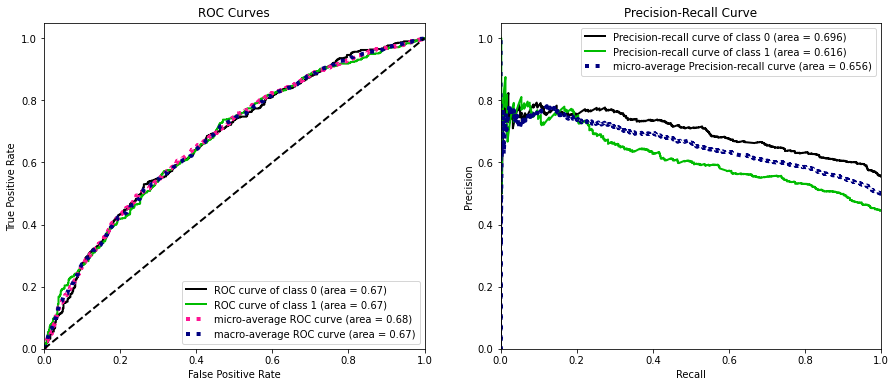

In [20]:
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/III.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.rename(columns={ df.columns[-1]: "label" }, inplace = True)  
## Normalize data
norm_data= normalize_data(df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# IV PSD

file path-------------- ../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/IV.csv -------------
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Length of train:  13938 Length of test : 3485
Numbers of class instances (Train): {0: 8806, 1: 5132}
Numbers of class instances (Test): {0: 2174, 1: 1311}
Length of train:  10264 Length of label : 10264
Numbers of class instances (Undersampling): {0: 5132, 1: 5132}
---------------Train Random forest----------------
Confusion matrix 
 [[1408  766]
 [ 497  814]]
Balance Accuracy= 0.6342770850569486
Class wise accuracy [0.64765409 0.62090008]
Per class accuracy class 1 0.6375896700143472
Per class accuracy class 0 0.6375896700143472
average per class  accuracy 0.6375896700143472
ClassificationReport 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      2174
           1       0.52      0.62      0.56      1311


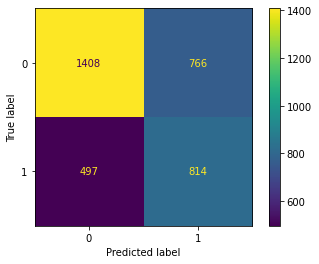

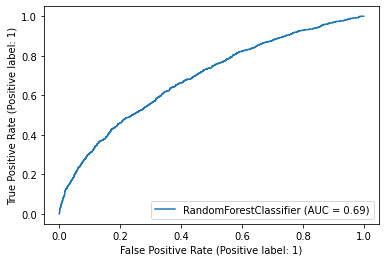

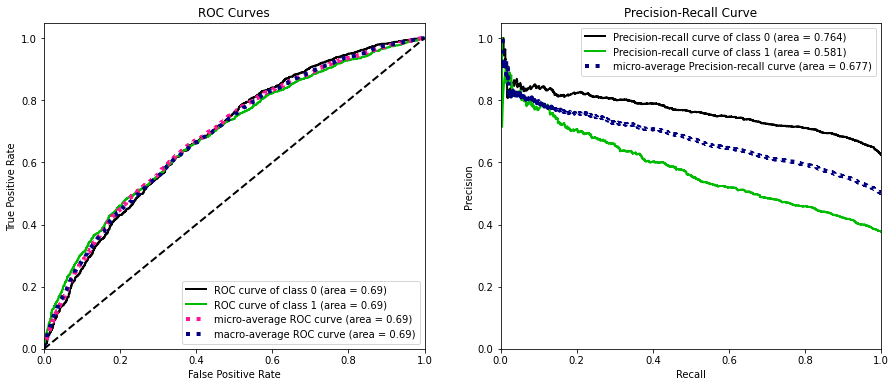

-------------------Train SVM----------------------
Confusion matrix 
 [[1557  617]
 [ 776  535]]
Balance Accuracy= 0.5621383916573162
Class wise accuracy [0.71619135 0.40808543]
Per class accuracy class 1 0.6002869440459111
Per class accuracy class 0 0.6002869440459111
average per class  accuracy 0.6002869440459111
ClassificationReport 
               precision    recall  f1-score   support

           0       0.67      0.72      0.69      2174
           1       0.46      0.41      0.43      1311

    accuracy                           0.60      3485
   macro avg       0.57      0.56      0.56      3485
weighted avg       0.59      0.60      0.59      3485

Scores [0.5523624  0.55625913 0.57233317 0.57282026 0.55945419] 0.5626458309002468
F1 weighted 0.594435751574487
Precison weighted 0.5910265590180643
recall weighted 0.6002869440459111
Confusion matrix 



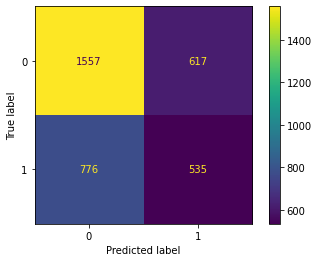

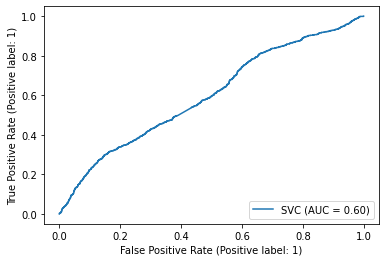

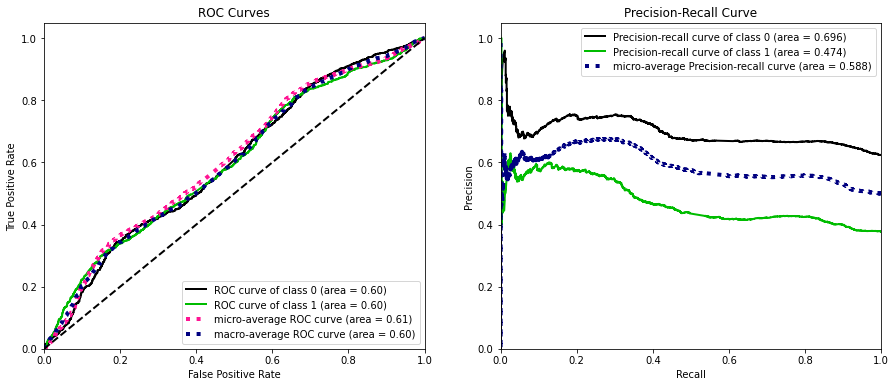

In [21]:
filepath='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/IV.csv'
print("file path--------------",filepath,"-------------")
df=pd.read_csv(filepath)
df.rename(columns={ df.columns[-1]: "label" }, inplace = True)  
## Normalize data
norm_data= normalize_data(df)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# IV (Time and PSD)

(17423, 20) (17423, 6)
(17423, 25)
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Numbers of class instances (Raw): {0: 10980, 1: 6443}
Length of train:  13938 Length of test : 3485
Numbers of class instances (Train): {0: 8806, 1: 5132}
Numbers of class instances (Test): {0: 2174, 1: 1311}
Length of train:  10264 Length of label : 10264
Numbers of class instances (Undersampling): {0: 5132, 1: 5132}
---------------Train Random forest----------------
Confusion matrix 
 [[1596  578]
 [ 376  935]]
Balance Accuracy= 0.7236633341683877
Class wise accuracy [0.73413063 0.71319603]
Per class accuracy class 1 0.7262553802008608
Per class accuracy class 0 0.7262553802008608
average per class  accuracy 0.7262553802008608
ClassificationReport 
               precision    recall  f1-score   support

           0       0.81      0.73      0.77      2174
           1       0.62      0.71      0.66      1311

    accuracy                           0.73      3485
   macro avg       0.71      0.72

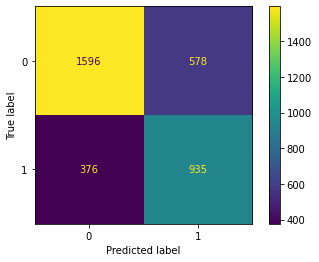

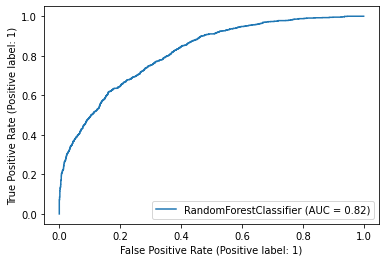

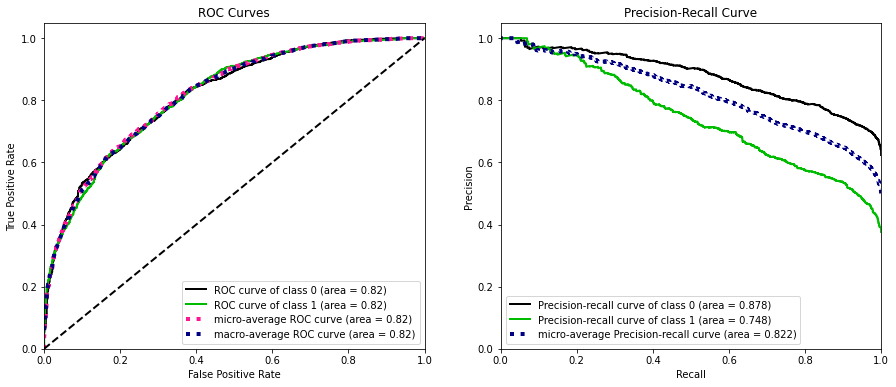

-------------------Train SVM----------------------
Confusion matrix 
 [[1634  540]
 [ 524  787]]
Balance Accuracy= 0.6759575231025847
Class wise accuracy [0.75160994 0.60030511]
Per class accuracy class 1 0.6946915351506456
Per class accuracy class 0 0.6946915351506456
average per class  accuracy 0.6946915351506456
ClassificationReport 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      2174
           1       0.59      0.60      0.60      1311

    accuracy                           0.69      3485
   macro avg       0.68      0.68      0.68      3485
weighted avg       0.70      0.69      0.70      3485

Scores [0.6809547  0.6687774  0.68631271 0.68046761 0.67446394] 0.6781952716938746
F1 weighted 0.6950535938603446
Precison weighted 0.695445006635909
recall weighted 0.6946915351506456
Confusion matrix 



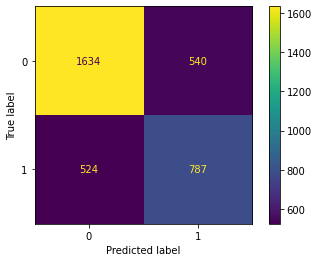

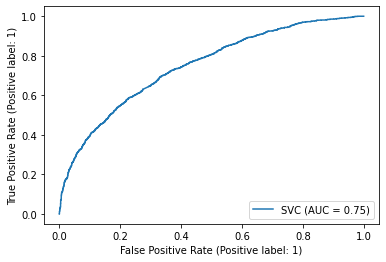

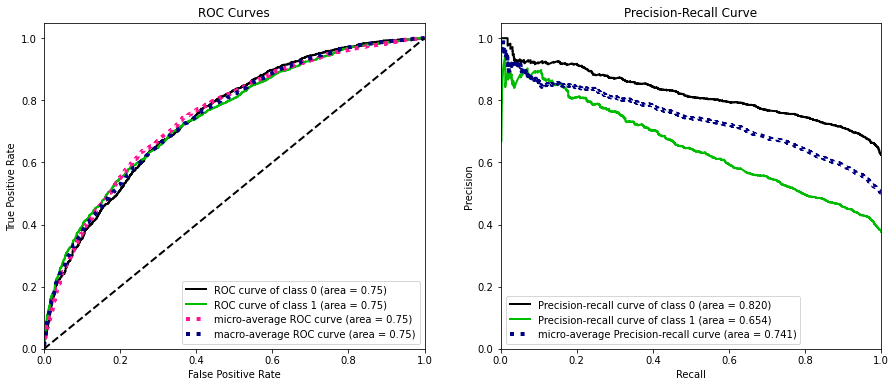

In [12]:
filepath1='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/IV.csv'
filepath2='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/IV.csv'

df1=pd.read_csv(filepath1)
df2=pd.read_csv(filepath2)

df1.rename(columns={ df1.columns[-1]: "label" }, inplace = True)  
df2.rename(columns={ df2.columns[-1]: "label" }, inplace = True)  
print(df1.shape,df2.shape)

df3=pd.concat([df1.iloc[:,:-1],df2.iloc[:,:-1],df1.iloc[:,-1:]],axis=1,ignore_index=False)
print(df3.shape)

## Normalize data
norm_data= normalize_data(df3)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# II TIME +PSD

(17327, 20) (17327, 6)
(17327, 25)
Numbers of class instances (Raw): {0: 996, 1: 16331}
Numbers of class instances (Raw): {0: 996, 1: 16331}
Length of train:  13861 Length of test : 3466
Numbers of class instances (Train): {0: 791, 1: 13070}
Numbers of class instances (Test): {0: 205, 1: 3261}
Length of train:  1582 Length of label : 1582
Numbers of class instances (Undersampling): {0: 791, 1: 791}
---------------Train Random forest----------------
Confusion matrix 
 [[ 135   70]
 [1027 2234]]
Balance Accuracy= 0.6718012580309796
Class wise accuracy [0.65853659 0.68506593]
Per class accuracy class 1 0.6834968263127524
Per class accuracy class 0 0.6834968263127524
average per class  accuracy 0.6834968263127524
ClassificationReport 
               precision    recall  f1-score   support

           0       0.12      0.66      0.20       205
           1       0.97      0.69      0.80      3261

    accuracy                           0.68      3466
   macro avg       0.54      0.67      0

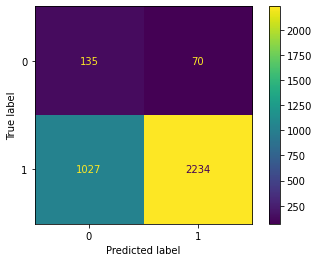

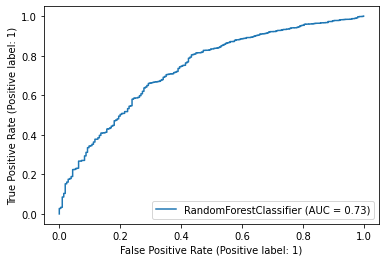

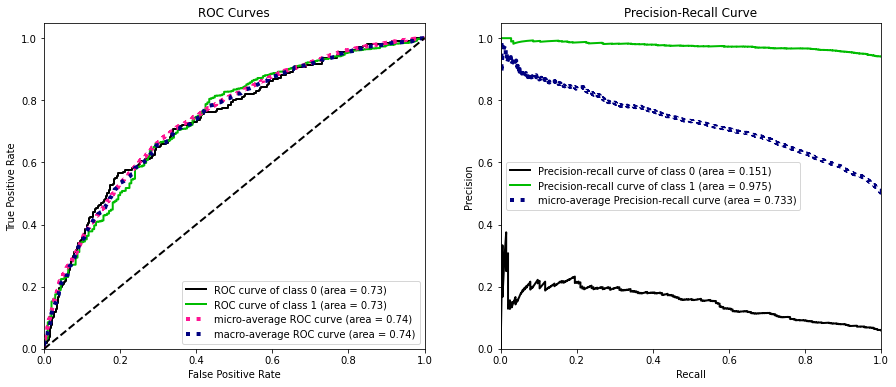

-------------------Train SVM----------------------
Confusion matrix 
 [[ 144   61]
 [1530 1731]]
Balance Accuracy= 0.616628895819777
Class wise accuracy [0.70243902 0.53081877]
Per class accuracy class 1 0.5409694171956145
Per class accuracy class 0 0.5409694171956145
average per class  accuracy 0.5409694171956145
ClassificationReport 
               precision    recall  f1-score   support

           0       0.09      0.70      0.15       205
           1       0.97      0.53      0.69      3261

    accuracy                           0.54      3466
   macro avg       0.53      0.62      0.42      3466
weighted avg       0.91      0.54      0.65      3466

Scores [0.5488959  0.57413249 0.58860759 0.58860759 0.63291139] 0.5866309946891347
F1 weighted 0.6536798884129105
Precison weighted 0.9139149989269248
recall weighted 0.5409694171956144
Confusion matrix 



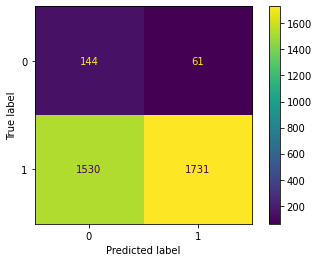

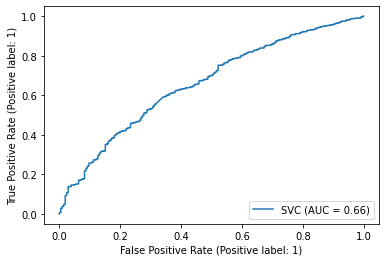

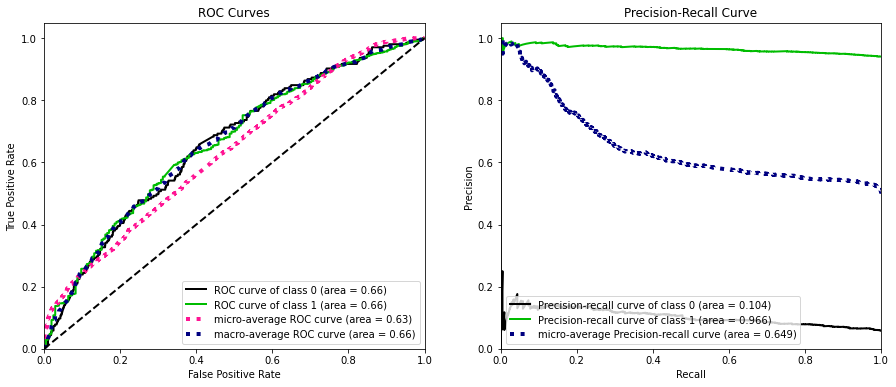

In [13]:
filepath1='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/II.csv'
filepath2='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/II.csv'

df1=pd.read_csv(filepath1)
df2=pd.read_csv(filepath2)

df1.rename(columns={ df1.columns[-1]: "label" }, inplace = True)  
df2.rename(columns={ df2.columns[-1]: "label" }, inplace = True)  
print(df1.shape,df2.shape)

df3=pd.concat([df1.iloc[:,:-1],df2.iloc[:,:-1],df1.iloc[:,-1:]],axis=1,ignore_index=False)
print(df3.shape)

## Normalize data
norm_data= normalize_data(df3)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

# III TIME +PSD

(6167, 20) (6167, 6)
(6167, 25)
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Numbers of class instances (Raw): {0: 3499, 1: 2668}
Length of train:  4933 Length of test : 1234
Numbers of class instances (Train): {0: 2814, 1: 2119}
Numbers of class instances (Test): {0: 685, 1: 549}
Length of train:  4238 Length of label : 4238
Numbers of class instances (Undersampling): {0: 2119, 1: 2119}
---------------Train Random forest----------------
Confusion matrix 
 [[506 179]
 [112 437]]
Balance Accuracy= 0.7673394227061812
Class wise accuracy [0.73868613 0.79599271]
Per class accuracy class 1 0.7641815235008104
Per class accuracy class 0 0.7641815235008104
average per class  accuracy 0.7641815235008104
ClassificationReport 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       685
           1       0.71      0.80      0.75       549

    accuracy                           0.76      1234
   macro avg       0.76      0.77      0.76    

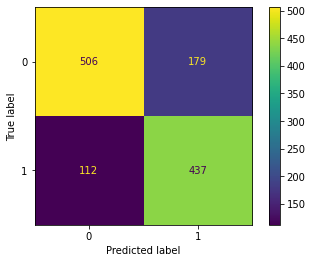

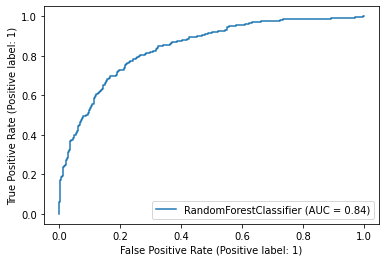

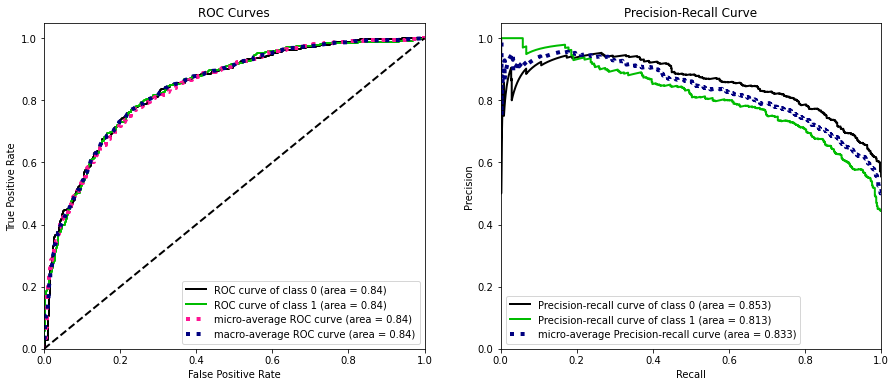

-------------------Train SVM----------------------
Confusion matrix 
 [[428 257]
 [120 429]]
Balance Accuracy= 0.7031191416377488
Class wise accuracy [0.62481752 0.78142077]
Per class accuracy class 1 0.6944894651539708
Per class accuracy class 0 0.6944894651539708
average per class  accuracy 0.6944894651539708
ClassificationReport 
               precision    recall  f1-score   support

           0       0.78      0.62      0.69       685
           1       0.63      0.78      0.69       549

    accuracy                           0.69      1234
   macro avg       0.70      0.70      0.69      1234
weighted avg       0.71      0.69      0.69      1234

Scores [0.68278302 0.64858491 0.68632075 0.69893743 0.7012987 ] 0.6835849613508275
F1 weighted 0.6944619788260495
Precison weighted 0.7117707235707434
recall weighted 0.6944894651539708
Confusion matrix 



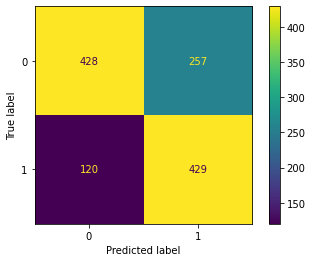

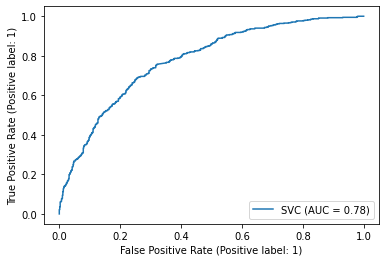

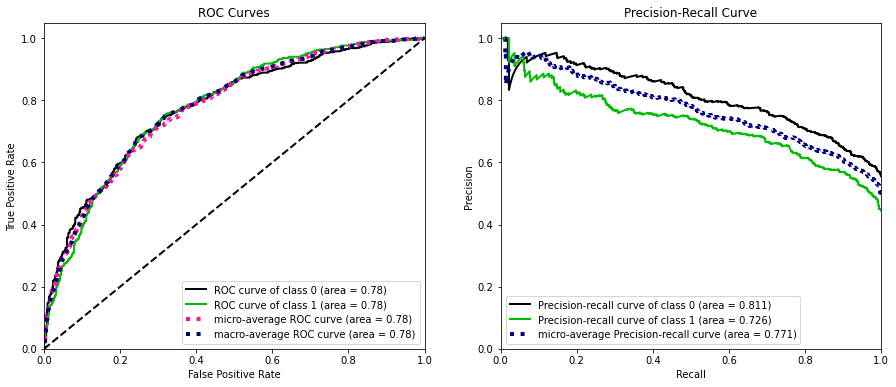

In [14]:
filepath1='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/Time/III.csv'
filepath2='../Data/correct_rotation_force/Raw_data/feature/WKZ_150600_207005/Feature/PSD/III.csv'

df1=pd.read_csv(filepath1)
df2=pd.read_csv(filepath2)

df1.rename(columns={ df1.columns[-1]: "label" }, inplace = True)  
df2.rename(columns={ df2.columns[-1]: "label" }, inplace = True)  
print(df1.shape,df2.shape)

df3=pd.concat([df1.iloc[:,:-1],df2.iloc[:,:-1],df1.iloc[:,-1:]],axis=1,ignore_index=False)
print(df3.shape)

## Normalize data
norm_data= normalize_data(df3)

## Separate data and label
label=np.array(norm_data.iloc[:,-1:]).ravel().astype(int)
data=np.array(norm_data.iloc[:,:-1])

unique, counts = np.unique(label, return_counts=True)
d=dict(zip(unique, counts))
print(f"Numbers of class instances (Raw): {d}")

# partition data
x_train, x_test, y_train, y_test,indices_train,indices_test=split_data(data,label)      

print("Length of train: ", len(x_train),"Length of test :", len(x_test))

unique, counts = np.unique(y_train, return_counts=True)
d1=dict(zip(unique, counts))
print(f"Numbers of class instances (Train): {d1}")

unique, counts = np.unique(y_test, return_counts=True)
d2=dict(zip(unique, counts))
print(f"Numbers of class instances (Test): {d2}")

undersample_data, undersample_label=undersampling(x_train,y_train)

print("---------------Train Random forest----------------")
model=train_model(undersample_data, undersample_label,'Random')
evaluation_matrix(model,undersample_data, undersample_label,x_test,y_test)
print("-------------------Train SVM----------------------")
model1=train_model(undersample_data, undersample_label,'SVM')
evaluation_matrix(model1,undersample_data, undersample_label,x_test,y_test)

In [15]:
import sklearn
print(sklearn.__version__)
sklearn.metrics.get_scorer_names()

1.1.2


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_